# 离散傅立叶变换(DFT，Discrete Fourier Transform)
- https://www.zhihu.com/question/22611929?sort=created

![](remove_freq.jpg)

## 2D正变换-DFT
## 
$$
    F(u, v) = \sum_{x=0}^{X_{size}-1}\sum_{y=0}^{Y_{size}-1}f(x, y)e^{-2j\pi (\frac{xu}{X_{size}} + \frac{yv}{Y_{size}} )}
$$

## 2D逆变换-IDFT
## 
$$
    f(x, y) = \frac{1}{U_{size}V_{size}} \sum_{u=0}^{U_{size}-1}\sum_{v=0}^{V_{size}-1}F(u, v)e^{2j\pi (\frac{xu}{X_{size}} + \frac{yv}{Y_{size}} )}
$$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def dft2d(image, xnfreq, ynfreq):
    yndata  = image.shape[0]
    xndata  = image.shape[1]

    output = np.zeros((ynfreq, xnfreq), dtype=np.complex)
    for xifreq in range(xnfreq):
        for yifreq in range(ynfreq):
            for xidata in range(xndata):
                for yidata in range(yndata):
                    output[yifreq, xifreq] += image[yidata, xidata] * np.exp(-2j * np.pi * (xifreq * xidata / xndata + yifreq * yidata / yndata))
    return output

def idft2d(dft_image, xndata, yndata):
    ynfreq  = dft_image.shape[0]
    xnfreq  = dft_image.shape[1]
    
    image = np.zeros((yndata, xndata), dtype=np.complex)
    for xifreq in range(xnfreq):
        for yifreq in range(ynfreq):
            for xidata in range(xndata):
                for yidata in range(yndata):
                    image[yidata, xidata] += dft_image[yifreq, xifreq] * np.exp(2j * np.pi * (xifreq * xidata / xndata + yifreq * yidata / yndata))
    return image / (xnfreq * ynfreq)

def fftshift(dft_image):
    
    h, w = dft_image.shape
    cx, cy = w // 2, h // 2
    
    lt = dft_image[:cy, :cx]
    rt = dft_image[:cy, cx:]
    lb = dft_image[cy:, :cx]
    rb = dft_image[cy:, cx:]
    
    new_dft = dft_image.copy()
    new_dft[:cy, :cx] = rb
    new_dft[:cy, cx:] = lb
    new_dft[cy:, :cx] = rt
    new_dft[cy:, cx:] = lt
    return new_dft

In [3]:
image = cv2.resize(cv2.imread("bck.png", 0), (28, 28)) / 255.0

In [4]:
width = image.shape[1]
height = image.shape[0]
dft_image = dft2d(image, width, height)

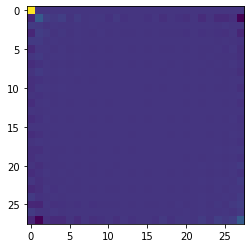

In [5]:
plt.imshow(dft_image.real)

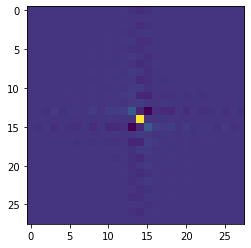

In [6]:
shift_dft = fftshift(dft_image)
plt.imshow(shift_dft.real)

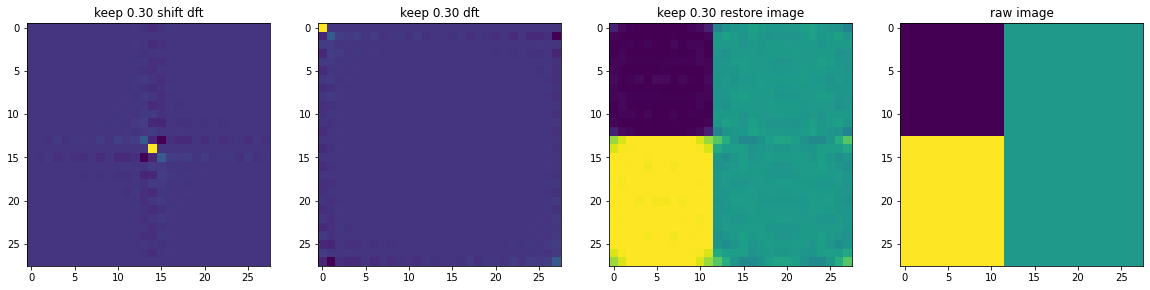

In [7]:
dft_vector = shift_dft.reshape(-1)
dft_range = np.sqrt(dft_vector.real ** 2 + dft_vector.imag ** 2)
dft_index = np.arange(len(dft_range))
dft_union = list(zip(dft_vector, dft_range, dft_index))
dft_union_sort = list(sorted(dft_union, key=lambda x: x[1], reverse=True))

keep_prob = 0.3
keep_dims = int(keep_prob * len(dft_union_sort))
keep_vector, keep_range, keep_index = zip(*dft_union_sort[:keep_dims])
dft_new_vector = np.zeros(dft_vector.shape, dtype=np.complex)
dft_new_vector[np.array(keep_index)] = keep_vector
keep_shift_dft = dft_new_vector.reshape(28, 28)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title(f"keep {keep_prob:.2f} shift dft")
plt.imshow(keep_shift_dft.real)

shift_keep_dft = fftshift(keep_shift_dft)
plt.subplot(1, 4, 2)
plt.title(f"keep {keep_prob:.2f} dft")
plt.imshow(shift_keep_dft.real)

restore_image = idft2d(shift_keep_dft, width, height)
plt.subplot(1, 4, 3)
plt.title(f"keep {keep_prob:.2f} restore image")
plt.imshow(restore_image.real, vmin=0, vmax=1)

plt.subplot(1, 4, 4)
plt.title(f"raw image")
plt.imshow(image, vmin=0, vmax=1)

In [8]:
matrix = np.array([
    [1, 2],
    [5, 3]
])

dft_matrix = dft2d(matrix, matrix.shape[1], matrix.shape[0])
idft2d(dft_matrix, matrix.shape[1], matrix.shape[0]).real

array([[1., 2.],
       [5., 3.]])